In [2]:
pd.set_option('display.float_format', '{:.2f}'.format)
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (15, 8)

### 확률론적 선형 회귀모형

- 부트스트래핑 : re-sampling
 - 회귀분석에 사용한 표본 데이터가 달라질 때 회귀분석의 결과는 어느정도 영향을 받는가

In [5]:
from sklearn.datasets import make_regression

X0, y, coef = make_regression(n_samples = 100, n_features = 1, noise =20, coef = True, random_state = 0)
coef

array(42.38550486)

In [6]:
dfX0 = pd.DataFrame(X0, columns=["X1"])
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(y, columns=["y"])

model = sm.OLS(dfy, dfX)
result = model.fit()

In [7]:
result.params

const   -1.63
X1      42.85
dtype: float64

In [8]:
%%time
N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N):
    idx = np.random.choice(len(dfy), len(dfy), replace=True)
    dfX2 = dfX.iloc[idx, :]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

CPU times: user 5.6 s, sys: 67.4 ms, total: 5.66 s
Wall time: 1.45 s


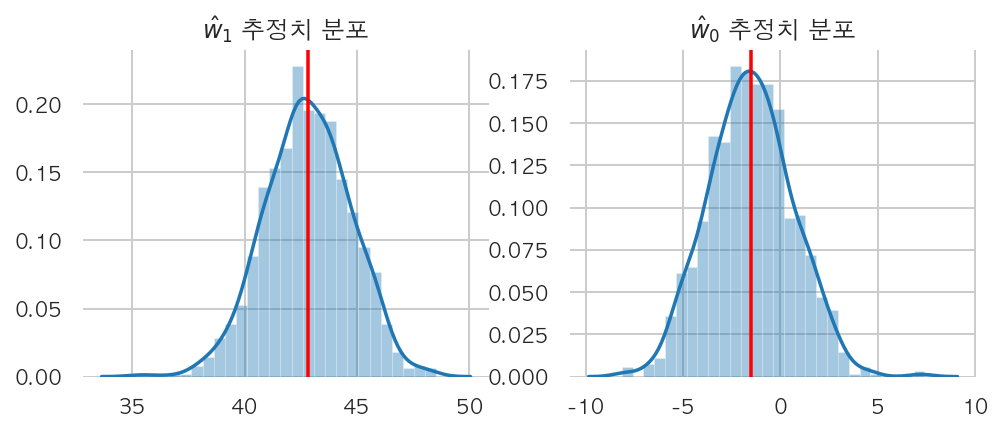

In [9]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()

In [10]:
params_w1.mean(), params_w1.std()

(42.81257520846804, 1.908030397862749)

In [11]:
params_w0.mean(), params_w0.std()

(-1.5213432062671286, 2.163951454219312)

In [12]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     400.3
Date:                Wed, 26 Feb 2020   Prob (F-statistic):           2.21e-36
Time:                        14:40:05   Log-Likelihood:                -448.09
No. Observations:                 100   AIC:                             900.2
Df Residuals:                      98   BIC:                             905.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6284      2.163     -0.753      0.4

 - 확률론적 선형 회귀모형을 하면 '부트스트래핑'을 하지 않아도 값을 구할 수 있다. 
 
---

#### 확률론적 선형 회귀모형

 - 확률모형
 
 1) 선형 정규분포가정
 
  - 종속변수 y가 확률변수 
  - 기대값 x의 위치가 달라지는 곳에서 결정됨
  
       - $\epsilon = y - w^Tx$
       - $p(\epsilon | \theta) = N(0,\sigma^2)$


           - x,y 중 그 어느 것도 그 자체로 정규 분포일 필요는 없다.(조건부 정규 분포) 
  
 2) 외생성 가정
 
  - $E[\epsilon | x] = 0$
  
 
 3) 조건부 독립 가정
 
  - 표본 자본의 공분산 값 --> x와 상관없이 항상 0
 
 
 4) 등분산성 가정
 
  - 잡음의 크기는 항상 똑같다. 
  - 공분산행렬이 항등행렬 형태가 되어야한다는 조건
  
---- 

#### 최대 가능도 방법을 사용한 선형회귀분석

 - 최적화 : $\hat w = (X^TX)^{-1}X^Ty$
 
---
#### 잔차의 분포

 - 잔차 $e = y - \hat w^Tx$도 정규분포를 따름

---
 - 잡음 $\epsilon$ , 잔차 $e$의 관계
  - $\hat y = X\hat w = X(X^TX)^{-1}X^Ty = Hy$
  
  
  
 - 잔차 $e$는 잡음 $\epsilon$의 선형 변환
 
      - $e = M\epsilon$

--- 
### 회귀 분석의 기하학

 - 변형행렬 $b = Ta$
 - 잔차행렬 $e = My$
 - 투영행렬 $\hat y = Hy$
 
 
  - $H = X(X^TX)^{-1}X^T$
  - $M = I-X(X^TX)^{-1}X^T$
 
---

잔차행렬, 투영행렬의 성질

 1) 대칭행렬
 
  $M^T = M , H^T = H$
 
 2) 멱등행렬
  
  $M^2 = M , H^2 = H$ 
 
 3) M과 H는 서로 직교

  $MH = HM = 0$
  
 4) M과 X는 직교
 
  $MX = 0$
 
 5) X에 H를 곱해도 변하지 않음. 
 
  $HX = X$

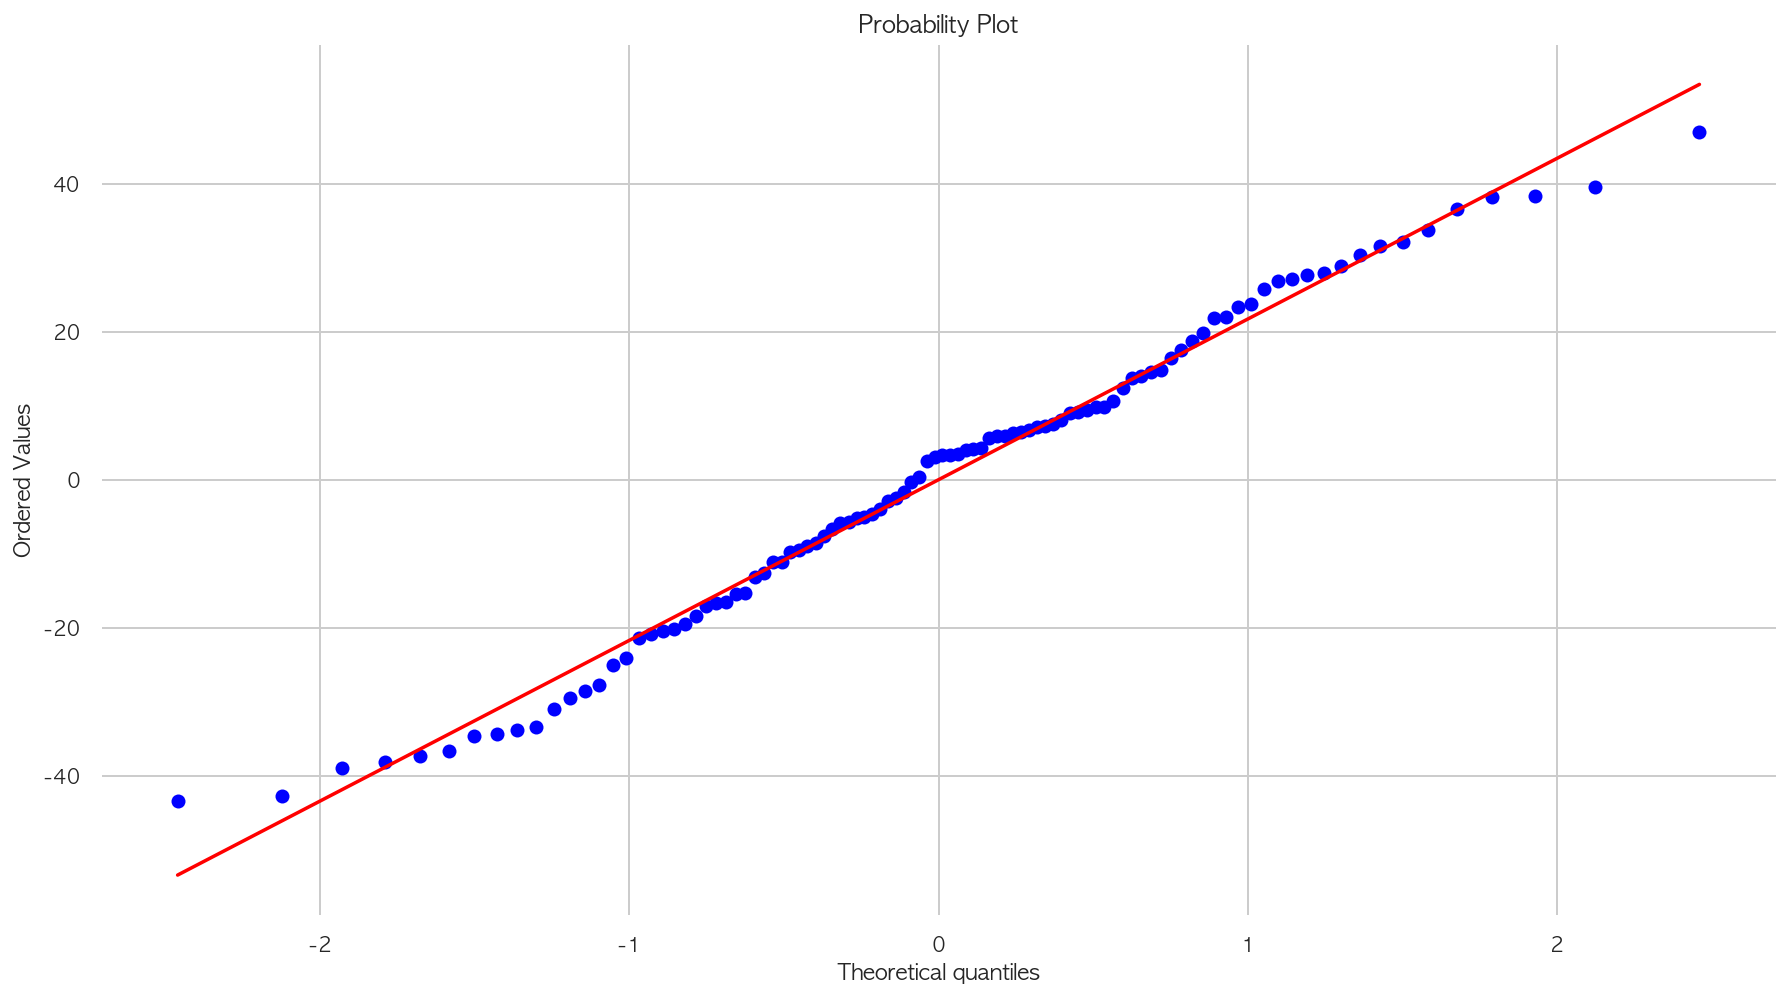

In [13]:
sp.stats.probplot(result.resid, plot=plt)
plt.show()

In [14]:
test = sm.stats.omni_normtest(result.resid)
for xi in zip (['chi^2', 'P-value'], test):
    print("%-12s: %6.3f"%xi)

chi^2       :  3.523
P-value     :  0.172


In [15]:
test = sm.stats.jarque_bera(result.resid)
for xi in zip(['Jarque-Bera', 'P-value', 'Skew', 'Kurtosis'], test):
    print("%-12s: %6.3f" % xi)

Jarque-Bera :  2.059
P-value     :  0.357
Skew        : -0.073
Kurtosis    :  2.312


--- 
#### 회귀 계수의 표준 오차

 - $\hat w = w + (X^TX)^{-1}X^TE[\epsilon]$ # 우리가 구하려는 w 값
 
 - $E[\hat w] = w$ # 원래 w값